# Practical Statistics for Data Scientists (Python)

## Chapter 1 - Exploratory Data Analysis

In [3]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust

import seaborn as sns
import matplotlib.pylab as plt

import wquantiles

import os 
# os.getcwd()
# os.chdir('')


'H:\\datascience\\beachr\\books\\ps4ds'

## Estimates of Location

In [7]:
# import data

state = pd.read_csv('data/state.csv')

dfw = pd.read_csv('data/dfw_airline.csv')

sp500_px = pd.read_csv('data/sp500_data.csv.gz', index_col=0)
sp500_sym = pd.read_csv('data/sp500_sectors.csv')

kc_tax = pd.read_csv('data/kc_tax.csv.gz')

lc_loans = pd.read_csv('data/lc_loans.csv')

airline_stats = pd.read_csv('data/airline_stats.csv')

In [24]:
state['Population'].mean()

6162876.3

In [25]:
trim_mean(state['Population'], 0.1)

4783697.125

In [26]:
state['Population'].median()

4436369.5

In [27]:
print(np.average(state['Murder.Rate'], weights=state['Population']))

4.445833981123393


In [28]:
print(wquantiles.median(state['Murder.Rate'], weights=state['Population']))

4.4


# Estimates of Variability

## Example: Variability estimates of state population

In [29]:
state['Population'].std() # standard deviation

6848235.347401142

In [30]:
state['Population'].quantile(0.75) - state['Population'].quantile(0.25) # IQR

4847308.0

In [31]:
robust.scale.mad(state['Population']) # median absolute deviation

3849876.1459979336

# Exploring the Data Distribution

## Percentiles and Boxplots

In [32]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.50, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

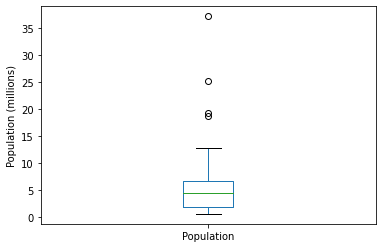

In [34]:
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')

## Frequency Tables and Histograms

In [36]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

Text(0.5, 0, 'Population (millions)')

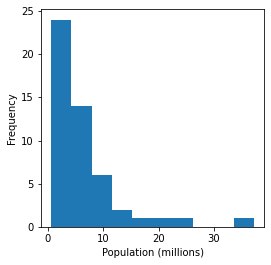

In [37]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize = (4, 4))
ax.set_xlabel('Population (millions)')

## Density Plots and Estimates

Text(0.5, 0, 'Murder Rate (per 100,000)')

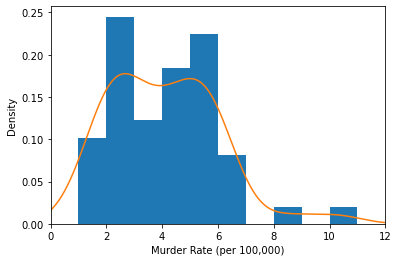

In [38]:
ax = state['Murder.Rate'].plot.hist(density = True, xlim = [0,12], bins = range(1,12))
state['Murder.Rate'].plot.density(ax = ax)
ax.set_xlabel('Murder Rate (per 100,000)')

## Exploring Binary and Categorical Data

Text(0, 0.5, 'Count')

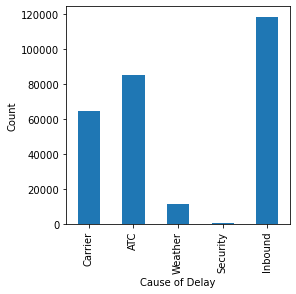

In [42]:
ax = dfw.transpose().plot.bar(figsize = (4, 4), legend = False)
ax.set_xlabel('Cause of Delay')
ax.set_ylabel('Count')

## Correlation

<AxesSubplot:>

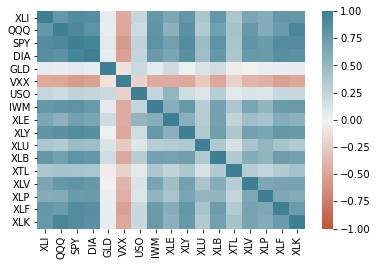

In [53]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01',
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
                    
sns.heatmap(etfs.corr(), vmin = -1, vmax = 1,
            cmap = sns.diverging_palette(20, 220, as_cmap = True))


## Scatterplots

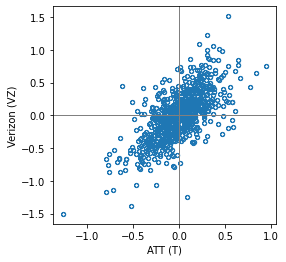

In [11]:
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol'] # determine telecom symbols
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]

ax = telecom.plot.scatter(x = 'T', y = 'VZ', figsize = (4, 4), marker = '$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color = 'grey', lw = 1)
ax.axvline(0, color = 'grey', lw = 1)

## Multivariate Analysis

In [10]:
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) &
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
kc_tax0.shape

(432693, 3)

Text(0, 0.5, 'Tax-Assessed Value')

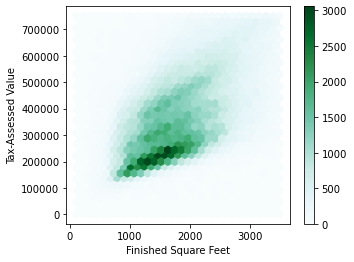

In [14]:
# hex bin
ax = kc_tax0.plot.hexbin(x = 'SqFtTotLiving', y = 'TaxAssessedValue',
gridsize = 30, sharex = False, figsize = (5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

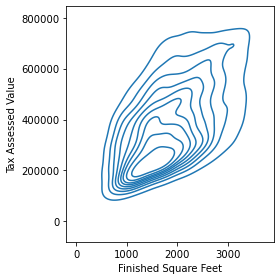

In [18]:
### density
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

## Exploring Two or More Variables

In [6]:
### contigency table
crosstab = lc_loans.pivot_table(index = 'grade', columns = 'status',
                                aggfunc = lambda x: len(x), margins = True) # margins keyword arg will add col + row sums

df = crosstab.loc['A':'G' ,:].copy() # copy of pivot table, ignoring the column sums
df.loc[:, 'Charged Off' : 'Late'] = df.loc[:, 'Charged Off' : 'Late'].div(df['All'],    
                                                                          axis = 0) # divide rows w/ row sums
df['All'] = df['All'] / sum(df['All']) # divide 'All' column by its sum
perc_crosstab = df

print(df)

status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118258  0.654371    0.180409  0.046962  0.028614
G          0.126196  0.614008    0.198396  0.061401  0.007187


## Categorical and Numeric Data

Text(0.5, 0.98, '')

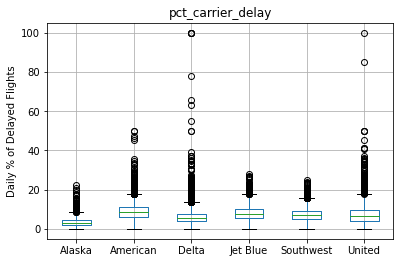

In [8]:
# boxplot: compare how % of flight delays varies across airlines
ax = airline_stats.boxplot(by = 'airline', column = 'pct_carrier_delay')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

H:\pyver\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Daily % of Delayed Flights')

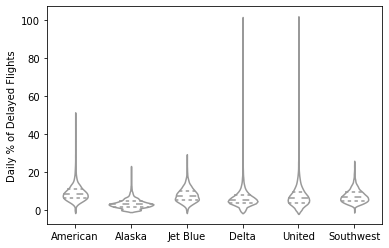

In [9]:
# violin plot: ''
ax = sns.violinplot(airline_stats.airline, airline_stats.pct_carrier_delay,
                    inner = 'quartile', color = 'white')

ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

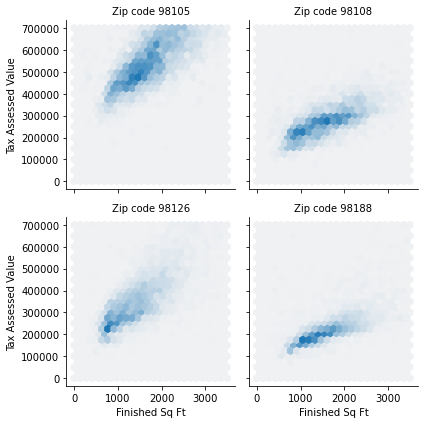

In [11]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes), :]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap = True)
    plt.hexbin(x, y, gridsize = 25, cmap = cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col = 'ZipCode', col_wrap = 2) # specify conditioning variables
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue',
     extent = [0, 3500, 0, 700000]) # defines limits of x/y vars

g.set_axis_labels('Finished Sq Ft', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')